In [1]:
# importing necessary modules.
import pandas as pd
from sqlalchemy import create_engine
import numpy as np
import matplotlib.pyplot as plt
from dotenv import load_dotenv
import config as cfg
import warnings
warnings.filterwarnings('ignore')

In [2]:
# creating engine
engine = create_engine(f'{cfg.password}://postgres:postgres@localhost/sql-challenge')

In [29]:
# creating pandas dataframes based on titles and salaries sql dataframes.
titles = pd.read_sql_table('Titles', engine)
salaries = pd.read_sql_table('Salaries', engine)
general_information = pd.read_sql('General_Employee_Information', engine)

In [32]:
# previewing general_information table.
general_information.head()

,emp_no,birth_date,first_name,last_name,gender,hire_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12


In [33]:
# verifying salaries data imported correctly.
salaries.head()

,emp_no,salary,from_date,to_date
0,10001,"$60,117.00",1986-06-26,1987-06-26
1,10002,"$65,828.00",1996-08-03,1997-08-03
2,10003,"$40,006.00",1995-12-03,1996-12-02
3,10004,"$40,054.00",1986-12-01,1987-12-01
4,10005,"$78,228.00",1989-09-12,1990-09-12


In [34]:
# dropping unwanted symbols in salary column and converting the column from object to float.
salaries['salary'] = salaries['salary'].str.replace('.', '')
salaries['salary'] = salaries['salary'].str.replace(',', '')
salaries['salary'] = salaries['salary'].str.replace('$', '')
salaries['salary'] = salaries['salary'].astype(int)

In [35]:
# getting rid of extra zeros.
salaries['salary'] = (salaries['salary'])/100

In [36]:
# verifying titles data imported correctly.
titles.head()

,emp_no,title,from_dat,to_date
0,10001,Senior Engineer,1986-06-26,NaT
1,10002,Staff,1996-08-03,NaT
2,10003,Senior Engineer,1995-12-03,NaT
3,10004,Engineer,1986-12-01,1995-12-01
4,10004,Senior Engineer,1995-12-01,NaT


Text(0.5, 0, 'Salary Ranges')

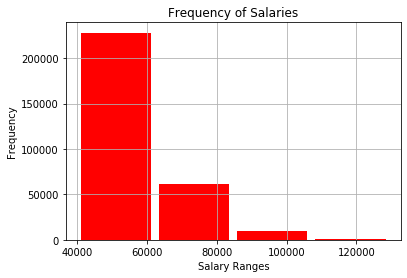

In [37]:
# Create a histogram to visualize the most common salary ranges for employees
hist = salaries.hist(column="salary", bins=4, rwidth=.9, color='r')
plt.title("Frequency of Salaries")
plt.ylabel("Frequency")
plt.xlabel("Salary Ranges")

In [38]:
# merging the salaries and titles dataframes.
joined = pd.merge(salaries, titles, on='emp_no')

In [39]:
# verifying merge worked.
joined.head()

,emp_no,salary,from_date,to_date_x,title,from_dat,to_date_y
0,10001,60117.0,1986-06-26,1987-06-26,Senior Engineer,1986-06-26,NaT
1,10002,65828.0,1996-08-03,1997-08-03,Staff,1996-08-03,NaT
2,10003,40006.0,1995-12-03,1996-12-02,Senior Engineer,1995-12-03,NaT
3,10004,40054.0,1986-12-01,1987-12-01,Engineer,1986-12-01,1995-12-01
4,10004,40054.0,1986-12-01,1987-12-01,Senior Engineer,1995-12-01,NaT


In [40]:
# joining the joined and general_information tables together.
joined_again = pd.merge(joined, general_information, on="emp_no")

In [42]:
# previewing the joined_again table.
joined_again.head()

,emp_no,salary,from_date,to_date_x,title,from_dat,to_date_y,birth_date,first_name,last_name,gender,hire_date
0,10001,60117.0,1986-06-26,1987-06-26,Senior Engineer,1986-06-26,NaT,1953-09-02,Georgi,Facello,M,1986-06-26
1,10002,65828.0,1996-08-03,1997-08-03,Staff,1996-08-03,NaT,1964-06-02,Bezalel,Simmel,F,1985-11-21
2,10003,40006.0,1995-12-03,1996-12-02,Senior Engineer,1995-12-03,NaT,1959-12-03,Parto,Bamford,M,1986-08-28
3,10004,40054.0,1986-12-01,1987-12-01,Engineer,1986-12-01,1995-12-01,1954-05-01,Chirstian,Koblick,M,1986-12-01
4,10004,40054.0,1986-12-01,1987-12-01,Senior Engineer,1995-12-01,NaT,1954-05-01,Chirstian,Koblick,M,1986-12-01


In [44]:
# just want to see certain columns.
joined_again = joined_again[["emp_no", "first_name", "last_name", "title"]]

In [45]:
# checking my id badge 499942.
joined_again.loc[joined["emp_no"] == 499942]

,emp_no,first_name,last_name,title
443224,499942,April,Foolsday,Technique Leader


April Foolsday!!!

In [12]:
# creating subdataframe called refined.
refined = joined[["title", "salary"]]

In [13]:
# verifying subdataframe.
refined.head()

,title,salary
0,Senior Engineer,60117.0
1,Staff,65828.0
2,Senior Engineer,40006.0
3,Engineer,40054.0
4,Senior Engineer,40054.0


In [14]:
# verifying new table.
refined.head()

,title,salary
0,Senior Engineer,60117.0
1,Staff,65828.0
2,Senior Engineer,40006.0
3,Engineer,40054.0
4,Senior Engineer,40054.0


In [15]:
# grouping data by title to find average salary of each title and reseting the title index.
grouped_refined = refined.groupby(['title']).mean().reset_index()

In [16]:
# verifying grouped and average data.
grouped_refined

,title,salary
0,Assistant Engineer,48493.204786
1,Engineer,48539.781423
2,Manager,51531.041667
3,Senior Engineer,48506.751806
4,Senior Staff,58503.286614
5,Staff,58465.271904
6,Technique Leader,48580.505772


In [17]:
# creating an empty table to append job titles to.
title_table = []
# looping through the title column of the grouped_refined table and appending them to the empty list created above.
for title in grouped_refined['title']:
    title_table.append(title)

Text(0, 0.5, 'Average Salary ($)')

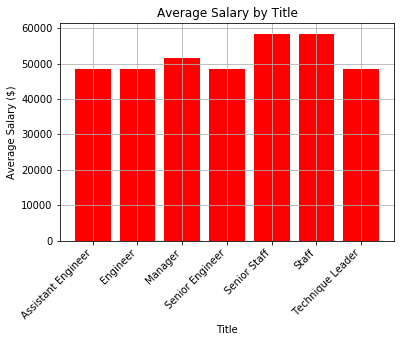

In [18]:
# creating x_axis based on length of title column.
x_axis = np.arange(len(grouped_refined["title"]))
# creating variable that matches x_axis.
tick_locations = [value for value in x_axis]
# attaching title_table to tick_locations.
plt.xticks(tick_locations, title_table, rotation="45", ha='right')
# creating bar chart of title by average salary.
plt.bar(x_axis, grouped_refined['salary'], color='r')
# creating grid.
plt.grid()
plt.title('Average Salary by Title')
plt.xlabel('Title')
plt.ylabel('Average Salary ($)')

It is weird that engineer and assitant engineer make the same 